# Hossein Zandinejad

## 610398129

### Data Minig - HW2

#### First, we import neccesary libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

/home/hossein/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


#### By the use of pandas, we input our dataset:

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### In the line below we check the existence of missing value in our dataset:

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### So we don't have any missing value. After that we check the outliers. (By the help of Boxplot)

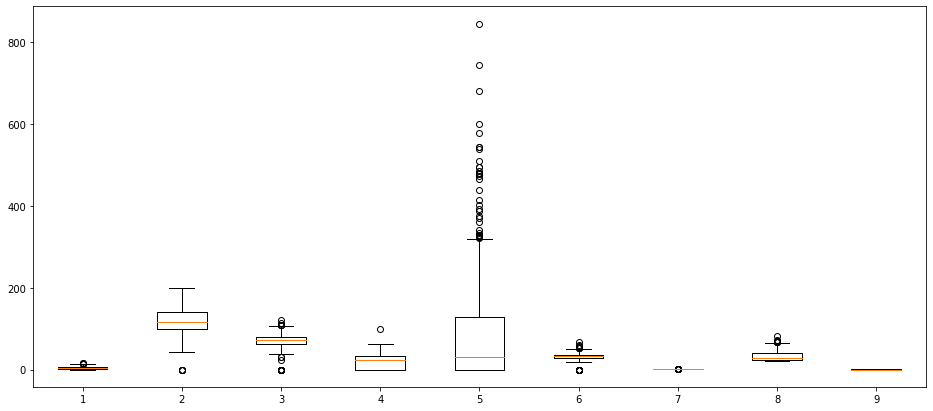

In [4]:
fig,ax=plt.subplots(1,1,figsize=(16,7))
ax.boxplot(data)
plt.show()

#### So we have some outliers in column 5 and we need to fix them:
##### In this case we use the IR method (Interquartile Range). 
##### So we should choose all the data between 15% and 85% in that column.

In [5]:
Q1 = np.percentile(data['BMI'], 15, interpolation = 'midpoint') 
Q3 = np.percentile(data['BMI'], 85, interpolation = 'midpoint')  
IQR = Q3 - Q1 
print("Q1 = ",Q1)
print("Q3 = ",Q3)
print("IQR = ",IQR) 

Q1 =  24.85
Q3 =  39.25
IQR =  14.399999999999999


In [6]:
(data['BMI']>Q3).sum(),(data['BMI']<Q1).sum()

(116, 116)

#### That's a large number of data! We can't ignore them. Let's find the outliners manually.

In [7]:
np.percentile(data['BMI'], 99, interpolation = 'midpoint') 

51.15

In [8]:
val = data['BMI'].sort_values(ascending=False)

In [9]:
print(val[:8])

177    67.1
445    59.4
673    57.3
125    55.0
120    53.2
303    52.9
247    52.3
193    52.3
Name: BMI, dtype: float64


#### So these are the BMI outliners. Now we delete them and after that we visualize the BMI again to validate  our work.

In [10]:
data = data[(data['BMI']>51)==False]

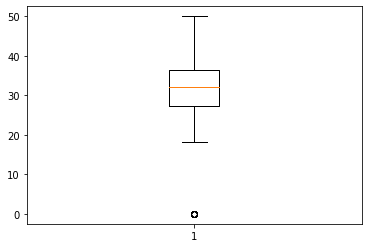

In [11]:
plt.boxplot(data['BMI'])
plt.show()

#### Nice!

#### Now let's split the dataset into X and y. (20% for test data)

In [12]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((532, 8), (228, 8), (532,), (228,))

#### We use Decision tree and Random forest classifiers:

In [13]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7368421052631579


#### Now let's change the criterion parameter to entropy: (For C4.5)

In [14]:
parameters_dt = dt.get_params()
parameters_dt['criterion'] = 'entropy'
parameters_dt['max_depth'] = 3
print(parameters_dt)
new_dt = DecisionTreeClassifier(**parameters_dt)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [15]:
new_dt = new_dt.fit(X_train,y_train)
y_pred = new_dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7807017543859649


##### Random Forest Classifier:

In [16]:
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8157894736842105


#### Now we want to use cross validation:

In [17]:
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('New_DT', new_dt))
models.append(('RF', RandomForestClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
    pipeline.fit(X_train, y_train)
    cv_results = model_selection.cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DT: 0.776316 (0.069625)
New_DT: 0.772368 (0.066587)
RF: 0.769737 (0.060081)


#### Comparing models with boxplot:

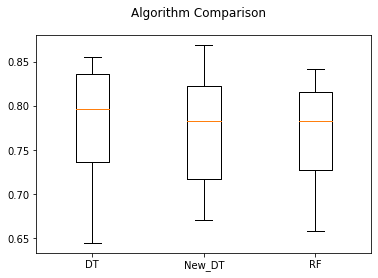

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Now let's plot confusion matrix of our models:

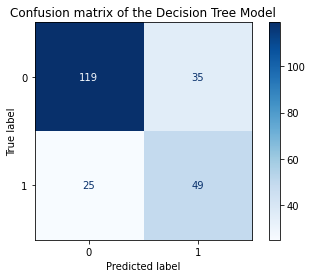

In [19]:
plot_confusion_matrix(dt, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the Decision Tree Model')
plt.show()

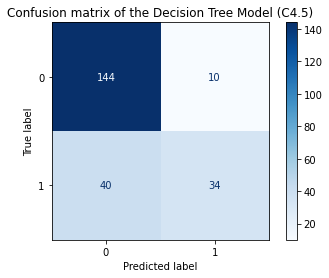

In [20]:
plot_confusion_matrix(new_dt, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the Decision Tree Model (C4.5)')
plt.show()

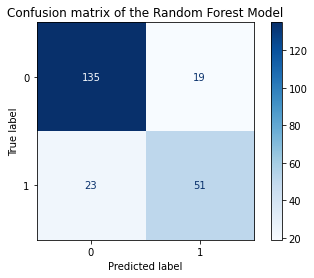

In [21]:
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the Random Forest Model')
plt.show()

### We want to plot the ROC for our models:

In [22]:
y_score1 = new_dt.predict_proba(X_test)[:,1]
y_score2 = rf.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [23]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.7837837837837838
roc_auc_score for Random Forest:  0.8796946296946297


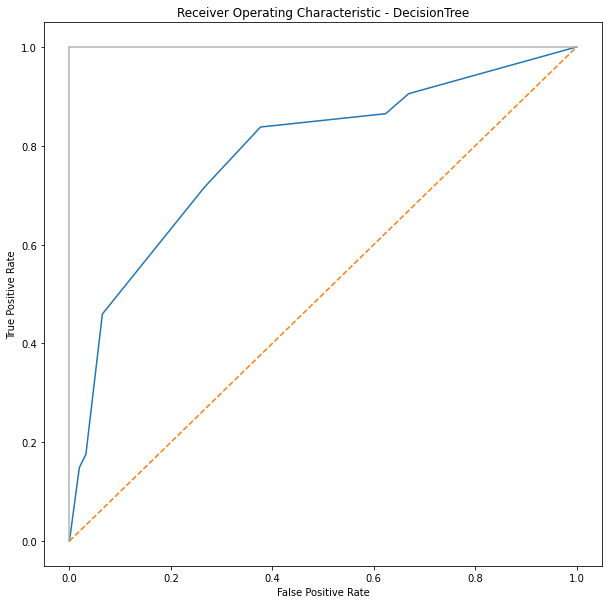

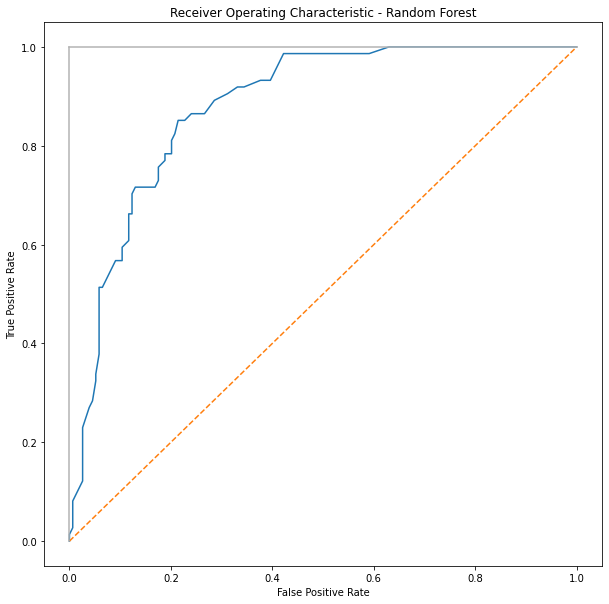

In [24]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## With the help of ROC plot, we understand that the Random Forest model is more efficient than the Decision Tree model.
### NOTE: roc_auc_score for decision tree is less than roc_auc_score for random forest.